# TP 3 Machine Learning
# Performence d'un classifieur
## $ Auteur: $
### $ Koussaila$ $KADI$ 
### $ kadi.koussaila@outlook.fr $

## Résumé:

On travaille sur des images de la base Pratheepan Dataset
(http://cs-chan.com/
downloads_skin_ dataset.html) dont on souhaite détecter les pixels de teinte chaire afin
d’accélérer un algorithme de détection de visages. Pour cela, la vérité de terrain a été déterminée
pour chaque image. On a récupéré dans X_train, y_train, les pixels des 26 premières images et
dans X_test, y_test, ceux des 4 dernières images. Seul un pixel sur 2000 a été conservé pour
avoir des temps de calcul raisonnables. X_ est composé des composantes chromatiques Cb, Cr
de chaque pixel et y_ est composé de la classe du pixel, 1 si couleur peau, 0 sinon.


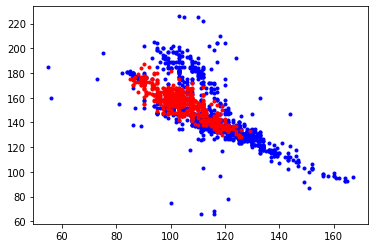

[113. 136.]


In [19]:
import numpy as np
import matplotlib.pyplot as plt


#import data:
[X_train, y_train, X_test, y_test] = np.load("TP3.npy",allow_pickle=True ) 

#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 

#Pixel non peau
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] )) 

plt.figure()
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show()

print(X_train[0])

On concedère tout les pixel qui on un label y=0 comme teinte non chaire et tout pixel avec y=1 comme teinte chaire. 
ici on constate en rouge tout les points de teinte chaire, qui sont représenté dans le verctaur T_train (T: pour true) et F_train (F: false c'est à dire les pixel qui sont de teinte non chaire).

### II- Modélisation de la densité de probabilité a priori de la teinte chaire par une loi normale 2D avec des dimensions décorrélées

### a) Estimation de la densité de probabilité a priori des pixels de teinte chaire

In [20]:
#moyennes:
mCb=np.mean(X_train.T[0][:]) #moyenne de la composante chromatique Cb
mCr=np.mean(X_train.T[1][:]) #moyenne de la composante chromatique Cr
#écart-types:
sigmaCb=np.std(X_train.T[0][:]) #écart-type Cb
sigmaCr=np.std(X_train.T[1][:]) #écart-type Cr


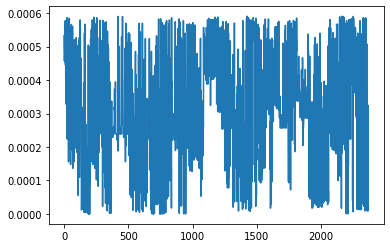

<function matplotlib.pyplot.show(close=None, block=None)>

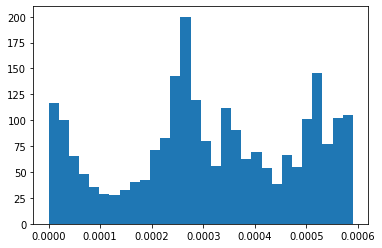

In [21]:
def norm1(x, m, s):
    p =1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)*(x-m)/(2*s*s))
    return p

#probabilité pour tout les pixels de la base d'apprentissage X_train d'appartenir à la teinte chaire:

Cb=X_train[:,0]
Cr=X_train[:,1]


p1_train=norm1(Cb,mCb,sigmaCb)*norm1(Cr,mCr,sigmaCr)
plt.figure()
plt.plot(p1_train)
plt.show()

plt.figure()
plt.hist(p1_train,bins=30)
plt.show

### b. Classification

In [22]:

def classifieur (p_test,m_train,y_test):
    y_pred=np.zeros(np.size(y_test))
    for i in  range (len(p_test)):
        if p_test[i]>m_train:
            y_pred[i]=1
    return y_pred


print(np.shape(X_test))

m_p1_train=p1_train.mean()
print(m_p1_train)

p1_test=norm1(X_test[:,0], mCb, sigmaCb) * norm1(X_test[:,1], mCr, sigmaCr) # 
y_pred=classifieur(p1_test,m_p1_train,y_test)

(284, 2)
0.00031394401133126056


In [23]:
p1_test= np.zeros(len(y_test))   #initialisé
for i in range ( len(y_test)) :
    p1_test[i]=norm1(X_test[i,0],mCb,sigmaCb)*norm1(X_test[i,1],mCr,sigmaCr)

seuil=np.mean(p1_train)
print(seuil)

TP=0
TN=0
FP=0
FN=0


for i in range(len(p1_test)):
  if (p1_test[i]>seuil):
    if y_test[i]==1:
      TP=TP+1
    else:
      FP=FP+1
  else :
    if y_test[i]==0:
      TN=TN+1
    else:
      FN=FN+1

print(TP,TN,FP,FN)

0.00031394401133126056
86 82 98 18


In [24]:
sensibilité=TP/(TP+FN)
spécifité=TN/(FP+TN)
print(sensibilité,spécifité)


0.8269230769230769 0.45555555555555555


In [25]:
NB = 20
step = (np.max(p1_train) - np.min(p1_train) ) / NB
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)
print(SEUILS)

[5.52807354e-09 2.95349170e-05 5.90643060e-05 8.85936949e-05
 1.18123084e-04 1.47652473e-04 1.77181862e-04 2.06711251e-04
 2.36240640e-04 2.65770029e-04 2.95299418e-04 3.24828807e-04
 3.54358196e-04 3.83887585e-04 4.13416973e-04 4.42946362e-04
 4.72475751e-04 5.02005140e-04 5.31534529e-04 5.61063918e-04]


In [26]:
sens= np.zeros(20)
spe= np.zeros(20)
TP=0
TN=0
FP=0
FN=0

for j in range(len(SEUILS)) :
  TP=0
  TN=0
  FP=0
  FN=0
  for i in range(len(p1_test)):
    if (p1_test[i]>SEUILS[j]):
      if y_test[i]==1:
        TP=TP+1
      else:
        FP=FP+1
    else :
      if y_test[i]==0:
        TN=TN+1
      else:
        FN=FN+1
  sens[j]=TP/(TP+FN)
  spe[j]=TN/(FP+TN)
print(sens)
print(spe)

[1.         1.         1.         0.98076923 0.96153846 0.96153846
 0.96153846 0.96153846 0.91346154 0.86538462 0.83653846 0.81730769
 0.73076923 0.61538462 0.56730769 0.52884615 0.40384615 0.26923077
 0.17307692 0.09615385]
[0.         0.12222222 0.13888889 0.15       0.15555556 0.15555556
 0.15555556 0.16111111 0.17777778 0.27777778 0.31666667 0.5
 0.56666667 0.58333333 0.77777778 0.82222222 0.84444444 0.87777778
 0.96111111 0.97777778]


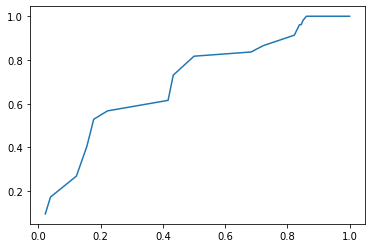

In [27]:

plt.plot(1-spe,sens)